In [ ]:
#hide
from sparseodes.traj_to_meas import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# SparseODEs

> This library reconstructs Ordinary Differential Equations (ODEs) from their solutions (trajectories) in time.

## Install

`pip install sparseodes`

## Api Goal

> **Input** a set of trajectories and corresponding time points (time, traj)

> **Output** ODE object learned from the data, also methods of solving the ODEs?


### Trajectories to Measurements
> Key class to determine the measured derivatives  
* compute derivatives
* decide on domain mapping (x to ind)
* put derivatives on grid



To demonstrate how to use the library let's generate a few trajectories.

In [ ]:
#hide
def rand_par(par,cvar):
    '''This function adds gaussian noise to parameters (means) stored in a dictionary. 
    Input
        par: dictionary of ODE parameters which constitute the means
        cvar: coeficient of variation of the distributon that each parameter will be sampled from (1 = 100% of the not noisy value).
    return
        dictionary with parameters sampled from gaussian around parameter means (inputs) or zero, if sampled value is negative
        '''
    temp = par.copy()
    for key in temp.keys():
        temp[key]=par[key]*(1+cvar*np.random.randn())
        if temp[key] < 0:
            temp[key] = 0         
    return temp  

In [ ]:
rand_par({"A": 2},0.3)

{'A': 3.3650467282224596}

### Example - Harmonic Oscillator

In [ ]:
def HOder(y,t,p):
    
    der = np.array([0*y[0]+1/p['m']*y[1],-p['k']*y[0]])
    return der

HOpar = dict(m=2,k=1)

In [ ]:
N=10
traj,time = traj_solve(N,0.1,HOder,HOpar,0.0)

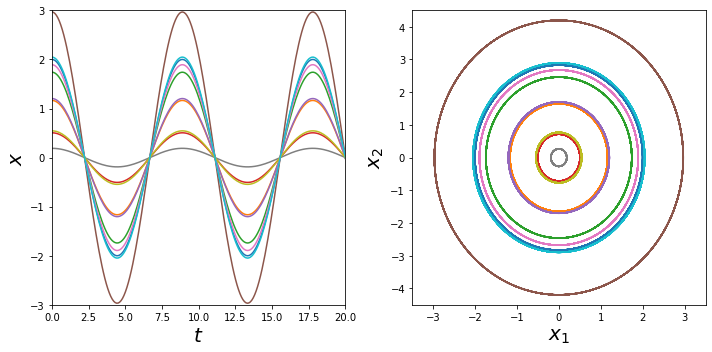

In [ ]:
#hide-input
f,axes = plt.subplots(1,2,figsize=(10,5))
for i in range(N):
    axes[0].plot(time[:],traj[i,:,0])
    axes[1].plot(traj[i,:,0],traj[i,:,1])
axes[0].set_xlabel("$t$",size = 20)
axes[0].set_ylabel("$x$",size =20)
axes[0].set_xlim((0,20))
axes[0].set_ylim((-3,3))
    
    
axes[1].set_xlabel("$x_1$",size = 20)
axes[1].set_ylabel("$x_2$",size =20)
axes[1].set_xlim((-3.5,3.5))
axes[1].set_ylim((-4.5,4.5))
plt.tight_layout()  

These are some trajectories of the 2 dimensional harmonic oscillator system which is given by the following ODE  
$$
\frac{d}{dt} x = 
\frac{d}{dt}
\begin{pmatrix}
x_1 \\
x_2 \\\end{pmatrix}= 
\frac{d}{dt}
\begin{pmatrix}
\frac{1}{m}x_2 \\
-k\,x_1 \\\end{pmatrix}=
\begin{pmatrix}
f_1 \\
f_2 \\
\end{pmatrix}\, .
$$  
Solutions of this ODE system are time series of values $x_1(t)$ and $x_2(t)$.
The goal of this library is to find approximate representations of the functions $f_1$ and $f_2$ from a set of ODE solutions $x_1(t)$, $x_2(t)$ and create an ODE object that can be used to find new solutions $x^`_1(t)$, $x^`_2(t)$.


Let's utilize the first class `traj_to_measurement` in this library. Under the hood this class performs the following steps
1) compute the derivatives $dx_i/dt$  
2) map $x_1$ and $x_2$ to a discrete grid $i_1$, $i_2$   
3) create measurements of the derivatives of $f$ along the trajectories $x_1$, $x_2$ on a grid for each of the ODE dimensions

In [ ]:
t2m = traj_2_measurement(traj,time)

2


Now we can easily visualize the measurements of the two-dimensional funcions $f_1(x_1,x_2)$ and $f_2(x_1,x_2)$ along the trajectories.

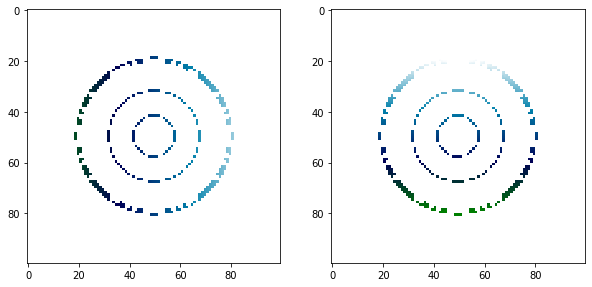

In [ ]:
#hide-input
f,ax=plt.subplots(1,2,figsize=(10,22))
ax[0].imshow(t2m.f_ms[0],vmin=-2,vmax=+2,cmap='ocean')
ax[1].imshow(t2m.f_ms[1],vmin=-2,vmax=+2,cmap='ocean')

### Measurements to Recontruction on Grid
* use measured derivatives on grid and reconstruct full domain

### Reconstruction to Solvable ODE
* Turn reconstructed full domain functions into solvable (using `odeint`) ODE object
* Can function also be plottable?
* should also be compatible with original ODE

### ODEsampler (optional) - Should be a helper class

Optional to test the method. Give a few examples of known ODE systems